In [10]:
from group import SE2
from repgroup import SE2 as SE2rep
import numpy as np
import matplotlib.pyplot as plt
from plotter import add_marker, square_plt

np.set_printoptions(precision=3, suppress=True)

In [11]:
# part 1 deliverable 1
se2 = SE2()
g = se2.element([0., 1.,  -np.pi/4])
h = se2.element([1., 2.,  -np.pi/2])
gh = g.left_action(h).value
hg = h.left_action(g).value
print(f"gh = {gh}")
print(f"hg = {hg}")

gh = [ 2.121  1.707 -2.356]
hg = [ 2.     2.    -2.356]


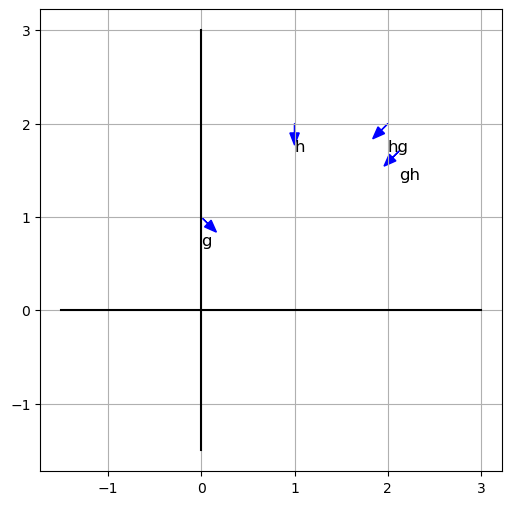

In [12]:
# part 1 deliverable 2
ax = square_plt()
add_marker(ax, gh, "gh")
add_marker(ax, hg, "hg")
add_marker(ax, g.value, "g")
add_marker(ax, h.value, "h")
plt.savefig("group.png")
plt.show()

g with respect to h: [ 1.    -1.     0.785]
h with respect to g: [ 0.     1.414 -0.785]


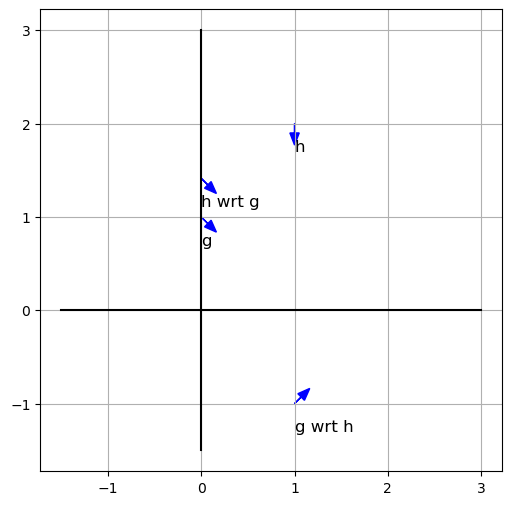

In [13]:
# part 1 deliverable 3
gwrth = h.inverted_element.left_action(g).value
hwrtg = g.inverted_element.left_action(h).value

ax = square_plt()
add_marker(ax, gwrth, "g wrt h")
add_marker(ax, hwrtg, "h wrt g")
add_marker(ax, g.value, "g")
add_marker(ax, h.value, "h")
print(f"g with respect to h: {gwrth}")
print(f"h with respect to g: {hwrtg}")
plt.savefig("relative_group.png")
plt.show()

In [14]:
# part 2 deliverable 1
se2r = SE2rep()
g = se2r.element([0., 1.,  -np.pi/4])
h = se2r.element([1., 2.,  -np.pi/2])
gh = g.left_action(h)
hg = h.left_action(g)
print(gh.derepresentation)
print(hg.derepresentation)

[ 2.121  1.707 -2.356]
[ 2.     2.    -2.356]


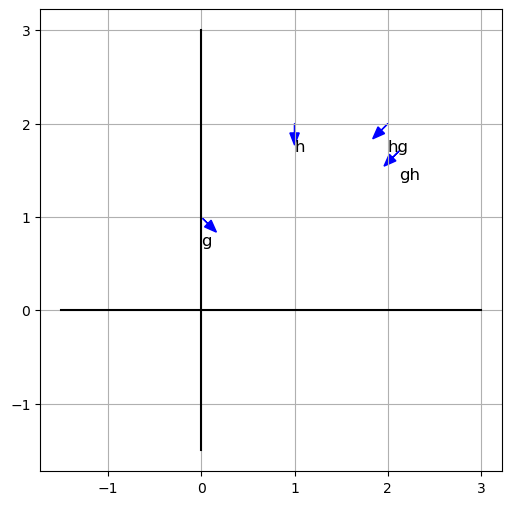

In [15]:
# part 2 deliverable 2
ax = square_plt()
add_marker(ax, gh.derepresentation, "gh")
add_marker(ax, hg.derepresentation, "hg")
add_marker(ax, g.derepresentation, "g")
add_marker(ax, h.derepresentation, "h")
plt.savefig("repgroup.png")
plt.show()

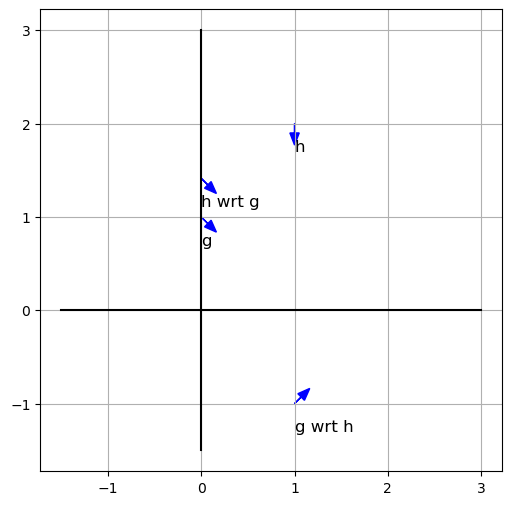

In [16]:
# part 2 deliverable 3
ax = square_plt()
g = se2r.element(np.array([0., 1.,  -np.pi/4]))
h = se2r.element(np.array([1., 2.,  -np.pi/2]))
add_marker(ax, g.derepresentation, "g")
add_marker(ax, h.derepresentation, "h")
hwrtg = g.inverted_element.left_action(h)
add_marker(ax, hwrtg.derepresentation, "h wrt g")
gwrth = h.inverted_element.left_action(g)
add_marker(ax, gwrth.derepresentation, "g wrt h")
plt.savefig("relative_repgroup.png")
plt.show()

[ 1.     2.    -1.571] is equal to [ 1.     2.    -1.571]


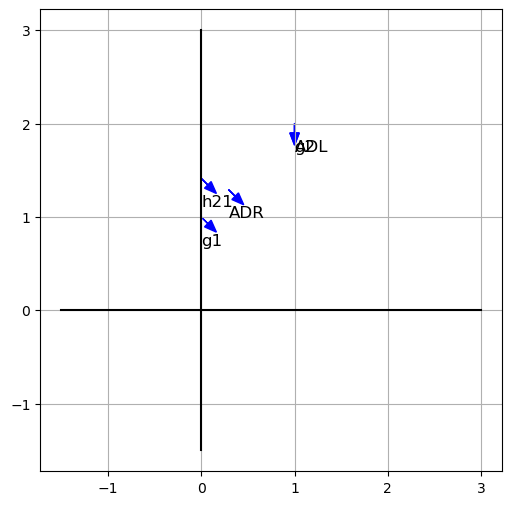

In [17]:
# part 3 deliverable 1
ax = square_plt()
# g2 = g1 h21
g1 = se2.element(np.array([0., 1.,  -np.pi/4]))
g2 = se2.element(np.array([1., 2.,  -np.pi/2]))
add_marker(ax, g1.value, "g1")
add_marker(ax, g2.value, "g2")
h21 = g1.inverted_element.left_action(g2)
add_marker(ax, h21.value, "h21")
adr = g1.AD(h21)
add_marker(ax, adr.value, "ADR")
adl = adr.left_action(g1)
add_marker(ax, adl.value, "ADL")
assert np.allclose(adl.value, g2.value)
print(f"{adl.value} is equal to {g2.value}")
plt.savefig("h21.png")
plt.show()

[ 0.     1.414 -0.785] is equal to [ 0.     1.414 -0.785]


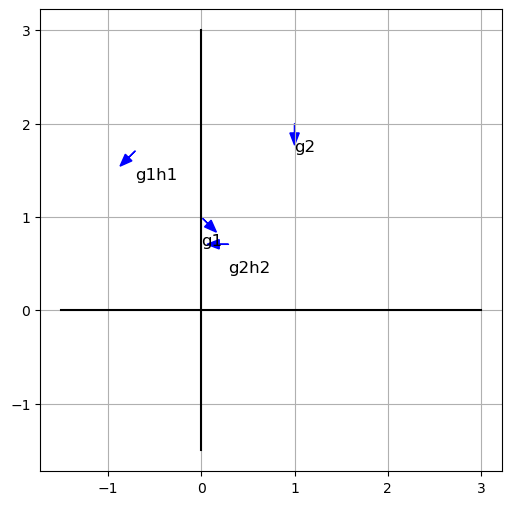

In [18]:
ax = square_plt()
h1 = se2.element(np.array([-1., 0.,  -np.pi/2]))
h2 = h21.AD_inv(h1)
add_marker(ax, g1.value, "g1")
add_marker(ax, g2.value, "g2")
g1h1 = g1.left_action(h1)
g2h2 = g2.left_action(h2)
add_marker(ax, g1h1.value, "g1h1")
add_marker(ax, g2h2.value, "g2h2")
relg2 = g1.inverted_element.left_action(g2)
rel_moved = g1h1.inverted_element.left_action(g2h2)
assert np.allclose(relg2.value, rel_moved.value)
print(f"{relg2.value} is equal to {rel_moved.value}")
plt.savefig("h21_inv.png")
plt.show()